In [5]:
import nengo
from nengo import spa
from nengo.synapses import filt

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn
import pylab
import matplotlib
import numpy
import scipy.ndimage
import scipy.cluster
%matplotlib inline

import os

In [2]:
def pre_plot_spikes(data, sample_by_variance=None,
                         sample=None, sample_filter_width=20,
                         cluster=False, cluster_filter_width=2,
                         merge=None, yticks=None,
                         style='image', sample_index=None, cluster_index=None):

        if sample_index:
            data = data[:, sample_index]
        elif sample_by_variance is not None and sample_by_variance < len(data.T):
            dd = scipy.ndimage.gaussian_filter1d(data.astype(float).T,sample_filter_width,axis=1)
            vard = numpy.var(dd,axis=1)

            threshold = sorted(vard)[-sample_by_variance]
            index = [k for k,v in enumerate(vard) if v >= threshold]
            data = data[:,index]
        if sample is not None and sample<len(data.T):
            stepsize = float(len(data.T))/sample
            data2 = []
            for k in range(sample):
                sub = data[:,int(k*stepsize):int((k+1)*stepsize)]
                count = numpy.sum(sub,axis=0)
                maxv = max(count)
                for i,v in enumerate(count):
                    if v == maxv:
                        data2.append(sub[:,i])
                        break
            data = numpy.array(data2).T

        if cluster_index:
            data = data[:, cluster_index]
        elif cluster:
            dd = scipy.ndimage.gaussian_filter1d(data.astype(float).T,cluster_filter_width,axis=1)
            z = scipy.cluster.hierarchy.linkage(dd)
            tree = scipy.cluster.hierarchy.to_tree(z)
            order = tree.pre_order()
            data = data[:,order]
        if merge is not None and merge<len(data.T):
            stepsize = float(len(data.T))/merge
            data2 = []
            for k in range(merge):
                v = numpy.sum(data[:,int(k*stepsize):int((k+1)*stepsize)],axis=1)
                data2.append(v)
            data = numpy.array(data2).T
        return data

In [6]:
D = 10
rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, rng=rng)
number_dict = {"ONE": 1, "TWO": 2, "THREE": 3, "FOUR": 4, "FIVE": 5,
               "SIX": 6, "SEVEN": 7, "EIGHT": 8, "NINE": 9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))
# This should be set to 10 for the actual final test
number_range = 9
number_list = list(number_ordered.keys())

orth_vecs = np.load(os.path.join("data", "vocab4.npz"))["vocab"]

for i in range(number_range):
    print(number_list[i])
    print(orth_vecs[i])
    vocab.add(number_list[i], orth_vecs[i])

ONE
[ 0.00305115  0.57450216 -0.06204154 -0.2707497   0.55891796  0.17386723
 -0.40567779 -0.19523658 -0.21656923  0.02388051]
TWO
[-0.18081317  0.4397866  -0.28397342 -0.40886753 -0.18487001 -0.13353118
  0.46052732  0.13512881  0.13546193 -0.47474008]
THREE
[ 0.05711095  0.32441494  0.4553405   0.02706714 -0.42005703  0.00603891
  0.11286156 -0.69833418  0.04352774  0.06810493]
FOUR
[-0.18782639  0.16009365  0.11373172 -0.34705571 -0.04652068 -0.37662394
 -0.03625641  0.22823754  0.34045225  0.701701  ]
FIVE
[ 0.04278547  0.35614144 -0.12775394  0.58774026  0.29774778  0.08018705
  0.56197974  0.05193293  0.01457499  0.30944886]
SIX
[ 0.33786187  0.13034673  0.185151   -0.25830536 -0.31438244  0.53256152
  0.14249351  0.41391749 -0.37869706  0.22439899]
SEVEN
[-0.09157174  0.28357846  0.54704932  0.29869391 -0.01674787 -0.41155458
 -0.17203678  0.42846669 -0.24769601 -0.28022408]
EIGHT
[-0.6692044   0.17707668 -0.14714678  0.27837177 -0.33497021  0.43276032
 -0.30704005  0.10957327  

In [7]:
c_d = np.load(os.path.join("data", "paper4_count_data.npz"))
e_d = np.load(os.path.join("data", "paper4_learning_data.npz"))
t = np.load(os.path.join("data", "paper4_time.npz"))["t"]

In [8]:
count_res = c_d["p_count_res"]
count_fin = c_d["p_count_fin"]
count_tot = c_d["p_count_tot"]
neu = c_d["p_neuron"]
keys = e_d["p_keys"]

In [15]:
t_mod = np.arange(count_res.shape[0]) * 0.005
t_keys = np.arange(keys.shape[0]) * 0.025
start = 475
end = 760
s_win = start
win = end
sk_win = int(start / 5)
k_win = int(end / 5)
vocab_range = 5

In [16]:
trange = t

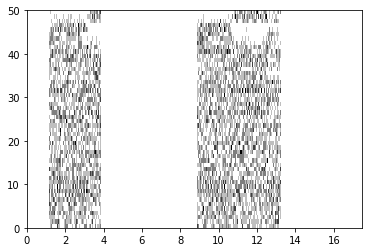

In [17]:
sn_win = start*5
n_win = end*5
chomped_neu = neu.copy()
chomped_neu[:int(2.47/0.001)] = 0
chomped_neu[int(2.69/0.001):int(3.1/0.001)] = 0
chomped_neu[int(3.455/0.001):] = 0
sp_data = pre_plot_spikes(chomped_neu[sn_win:n_win], sample_by_variance=200, merge=50, cluster=True)
plt.imshow(sp_data.T, aspect='auto', cmap=matplotlib.cm.gray_r, interpolation='nearest',
               extent=(trange[0], trange[-1], 0, len(sp_data.T)))

Done


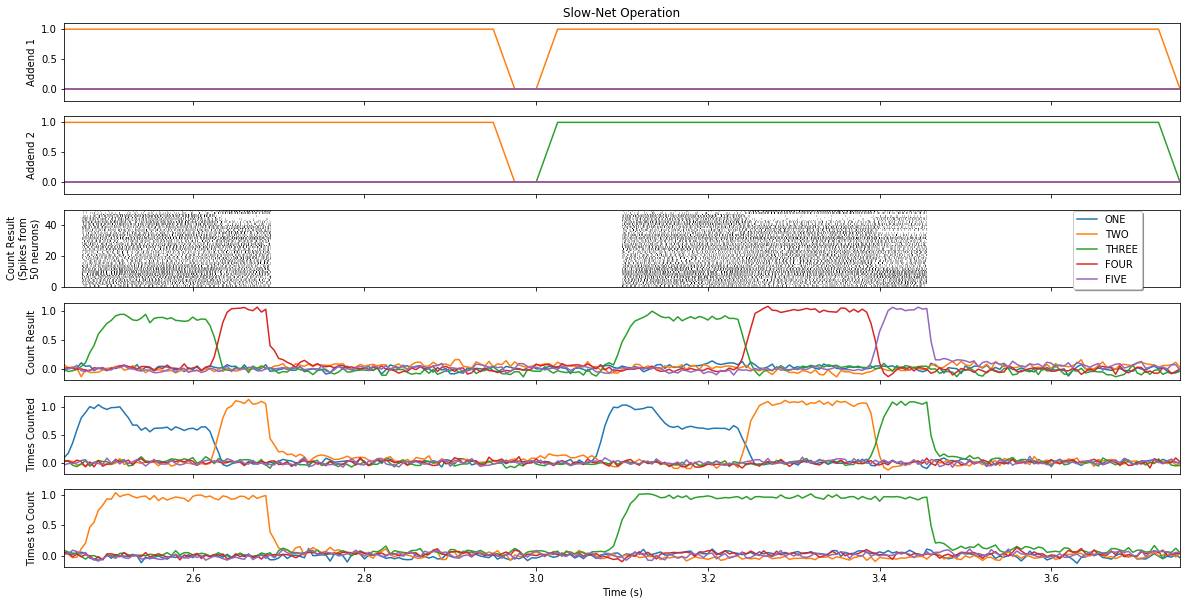

In [18]:
fig = plt.figure(figsize=(20,10))

x_min = 2.45
x_max = 3.75
contrast_scale = 1.0

p_key1 = fig.add_subplot(6, 1, 1)
p_key1.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, D:], vocab)[sk_win:k_win,:vocab_range])
#p_key1.plot(spa.similarity(keys[:, D:], vocab)[:win,:6])
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_xlim((x_min, x_max))
p_key1.set_ylabel("Addend 1")
p_key1.set_title("Slow-Net Operation")

p_key2 = fig.add_subplot(6, 1, 2)
p_key2.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, :D], vocab)[sk_win:k_win,:vocab_range])
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_xlim((x_min, x_max))
p_key2.set_ylabel("Addend 2")

p_spike = fig.add_subplot(6, 1, 3)
trange = t[sn_win:n_win]
im_res = p_spike.imshow(sp_data.T, aspect='auto', cmap=matplotlib.cm.gray_r,interpolation='nearest',
               extent=(trange[0], trange[-1], 0, len(sp_data.T)))
im_res.set_clim(0.0, numpy.max(sp_data)*contrast_scale)
p_spike.set_xlim((x_min, x_max))
p_spike.set_ylabel("Count Result\n(Spikes from\n50 neurons)")

p1 = fig.add_subplot(6, 1, 4)
p1.plot(t_mod[s_win:win], spa.similarity(count_res, vocab)[s_win:win,:vocab_range])
p1.legend(vocab.keys, bbox_to_anchor=(0.97, 2.25), frameon=True, fancybox=True, shadow=True)
p1.set_xlim((x_min, x_max))
p1.set_ylabel("Count Result")

p2 = fig.add_subplot(6, 1, 5)
p2.plot(t_mod[s_win:win], spa.similarity(count_tot, vocab)[s_win:win,:vocab_range])
p2.set_xlim((x_min, x_max))
p2.set_ylabel("Times Counted")

p3 = fig.add_subplot(6, 1, 6)
p3.plot(t_mod[s_win:win], spa.similarity(count_fin, vocab)[s_win:win,:vocab_range])
p3.set_xlim((x_min, x_max))
p3.set_ylabel("Times to Count")
p3.set_xlabel("Time (s)")

plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
#fig.savefig("count_plot.pdf", dpi=1000, format='pdf')
#fig.savefig("count_plot.png", dpi=300, format='png')
print("Done")

Done


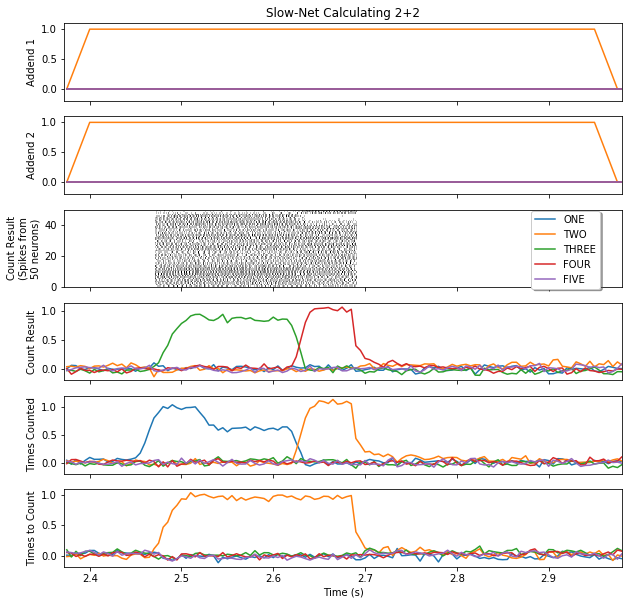

In [42]:
fig = plt.figure(figsize=(10,10))

x_min = 2.372
x_max = 2.98
contrast_scale = 1.0

p_key1 = fig.add_subplot(6, 1, 1)
p_key1.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, D:], vocab)[sk_win:k_win,:vocab_range])
#p_key1.plot(spa.similarity(keys[:, D:], vocab)[:win,:6])
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_xlim((x_min, x_max))
p_key1.set_ylabel("Addend 1")
p_key1.set_title("Slow-Net Calculating 2+2")

p_key2 = fig.add_subplot(6, 1, 2)
p_key2.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, :D], vocab)[sk_win:k_win,:vocab_range])
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_xlim((x_min, x_max))
p_key2.set_ylabel("Addend 2")

p_spike = fig.add_subplot(6, 1, 3)
trange = t[sn_win:n_win]
im_res = p_spike.imshow(sp_data.T, aspect='auto', cmap=matplotlib.cm.gray_r,interpolation='nearest',
               extent=(trange[0], trange[-1], 0, len(sp_data.T)))
im_res.set_clim(0.0, numpy.max(sp_data)*contrast_scale)
p_spike.set_xlim((x_min, x_max))
p_spike.set_ylabel("Count Result\n(Spikes from\n50 neurons)")

p1 = fig.add_subplot(6, 1, 4)
p1.plot(t_mod[s_win:win], spa.similarity(count_res, vocab)[s_win:win,:vocab_range])
p1.legend(vocab.keys, bbox_to_anchor=(0.97, 2.25), frameon=True, fancybox=True, shadow=True)
p1.set_xlim((x_min, x_max))
p1.set_ylabel("Count Result")

p2 = fig.add_subplot(6, 1, 5)
p2.plot(t_mod[s_win:win], spa.similarity(count_tot, vocab)[s_win:win,:vocab_range])
p2.set_xlim((x_min, x_max))
p2.set_ylabel("Times Counted")

p3 = fig.add_subplot(6, 1, 6)
p3.plot(t_mod[s_win:win], spa.similarity(count_fin, vocab)[s_win:win,:vocab_range])
p3.set_xlim((x_min, x_max))
p3.set_ylabel("Times to Count")
p3.set_xlabel("Time (s)")

plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
fig.savefig("count_plot22.pdf", dpi=1000, format='pdf')
print("Done")

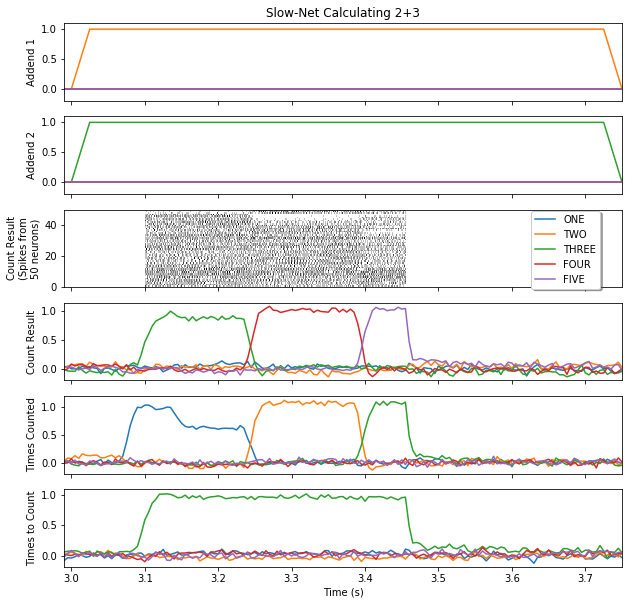

In [43]:
fig = plt.figure(figsize=(10,10))

x_min = 2.99
x_max = 3.75
contrast_scale = 1.0

p_key1 = fig.add_subplot(6, 1, 1)
p_key1.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, D:], vocab)[sk_win:k_win,:vocab_range])
#p_key1.plot(spa.similarity(keys[:, D:], vocab)[:win,:6])
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_xlim((x_min, x_max))
p_key1.set_ylabel("Addend 1")
p_key1.set_title("Slow-Net Calculating 2+3")

p_key2 = fig.add_subplot(6, 1, 2)
p_key2.plot(t_keys[sk_win:k_win], spa.similarity(keys[:, :D], vocab)[sk_win:k_win,:vocab_range])
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_xlim((x_min, x_max))
p_key2.set_ylabel("Addend 2")

p_spike = fig.add_subplot(6, 1, 3)
trange = t[sn_win:n_win]
im_res = p_spike.imshow(sp_data.T, aspect='auto', cmap=matplotlib.cm.gray_r,interpolation='nearest',
               extent=(trange[0], trange[-1], 0, len(sp_data.T)))
im_res.set_clim(0.0, numpy.max(sp_data)*contrast_scale)
p_spike.set_xlim((x_min, x_max))
p_spike.set_ylabel("Count Result\n(Spikes from\n50 neurons)")

p1 = fig.add_subplot(6, 1, 4)
p1.plot(t_mod[s_win:win], spa.similarity(count_res, vocab)[s_win:win,:vocab_range])
p1.legend(vocab.keys, bbox_to_anchor=(0.97, 2.25), frameon=True, fancybox=True, shadow=True)
p1.set_xlim((x_min, x_max))
p1.set_ylabel("Count Result")

p2 = fig.add_subplot(6, 1, 5)
p2.plot(t_mod[s_win:win], spa.similarity(count_tot, vocab)[s_win:win,:vocab_range])
p2.set_xlim((x_min, x_max))
p2.set_ylabel("Times Counted")

p3 = fig.add_subplot(6, 1, 6)
p3.plot(t_mod[s_win:win], spa.similarity(count_fin, vocab)[s_win:win,:vocab_range])
p3.set_xlim((x_min, x_max))
p3.set_ylabel("Times to Count")
p3.set_xlabel("Time (s)")

plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
fig.savefig("count_plot23.pdf", dpi=1000, format='pdf')